<a href="https://colab.research.google.com/github/Camgamez/icgamezc_Lab2.ipynb/blob/main/CamiloGamezLab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U fortran-magic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.7 MB/s eta 0:00:00


In [2]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

In [5]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [6]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [7]:
%%time

matmul(a, b)

CPU times: user 42 µs, sys: 4 µs, total: 46 µs
Wall time: 50.1 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [8]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.200
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4400.40
clflush size	: 64
cache_alignment	: 64
ad

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [9]:
def matmul_2(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [10]:
%%time

matmul_2(a,b)

IndexError: list index out of range

La multiplicacón de estas matrices falla ya que el tamaño de las columnas en la  matriz $A$ es diferente del tamaño de las filas en la matriz $B$.

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [12]:
def matmul_3(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    if (len(A[0])== len(B)):
      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(B)):
                  out[i][j] += A[i][k] * B[k][j]
      return out
    else:
      print ("Las matrices no se pueden multiplicar, ya que son de diferente tamaño.")

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [13]:
%%time

matmul_3(a,b)

Las matrices no se pueden multiplicar, ya que son de diferente tamaño.
CPU times: user 634 µs, sys: 65 µs, total: 699 µs
Wall time: 706 µs


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [14]:
a_3 = [[2,3,56],[32,5,4],[12,0,3]]
b_3 = [[3,7,1], [1,6,3], [7,5,0]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [15]:
%%time

matmul_3(a_3,b_3)

CPU times: user 29 µs, sys: 3 µs, total: 32 µs
Wall time: 37 µs


[[401, 312, 11], [129, 274, 47], [57, 99, 12]]

## Parte 4:
Construcción de DTFrame.


In [16]:
import random

In [17]:
random.normalvariate(0,1)

-0.10387102332967106

In [18]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.06158306765871069, 0.3743726348994748, 0.3813017276147458],
 [0.08896400651878422, 0.32087426146259523, 0.08449465582880156]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [19]:
import time
def average_matrix_multiplication_time(rows_a, cols_a, rows_b, cols_b):

  total_time = 0
  for _ in range(10):
      # Genera las dos matrices de tamaño predeterminado por la función
      matrix_a = random_matrix(rows_a, cols_a)
      matrix_b = random_matrix(rows_b, cols_b)

      # Empieza a medir el tiempo de ejecución.
      start_time = time.time()

      # Multiplica las Matrices
      producto = matmul_3(matrix_a, matrix_b)

      # Finaliza la medida del tiempo.
      end_time = time.time()

      # Calcula el tiempo de ejecución

      total_time += (end_time - start_time)

  # Calcula el tiempo promedio de ejecución.
  avg_time = total_time / 10
  return avg_time


rows_a, cols_a = 600, 100
rows_b, cols_b = 100, 600

avg_time = average_matrix_multiplication_time(rows_a, cols_a, rows_b, cols_b)
print(f"El tiempo promedio de la multiplicación de dos matrices es de: {avg_time:.6f} segundos")


El tiempo promedio de la multiplicación de dos matrices es de: 9.500559 segundos


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [20]:
# construir el Dataframe:

dataFrame = pd.DataFrame(columns = ["Lenguaje", "Tiempo-Promedio-Ejecucion"])

new_row = pd.DataFrame({"Lenguaje": "Python", "Tiempo-Promedio-Ejecucion": avg_time}, index=[0])

dataFrame = pd.concat([dataFrame, new_row], ignore_index=True)

print(dataFrame)

  Lenguaje  Tiempo-Promedio-Ejecucion
0   Python                   9.500559


<ipython-input-20-b7e92c8bef2c>:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dataFrame = pd.concat([dataFrame, new_row], ignore_index=True)


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [21]:
# Funcion para calcular el producto de matrices utilizando Numpy
def avg_Numpy_matrix_mutip_time(rows_a, cols_a, rows_b, cols_b):
    # Asegurar primero que las matrices sean multiplicables
    if cols_a != rows_b:
        raise ValueError("El tamaño de las columnas de A sea igual a las filas de B.")

    total_time = 0.0

    for _ in range(10):
        # Generar dos matrices aleatorias
        matrix_a = np.random.rand(rows_a, cols_a)
        matrix_b = np.random.rand(rows_b, cols_b)

        # Empezar a medir el tiempo
        start_time = time.time()

        # Multiplicar las matrices utilizando la funcion de Numpy para ello
        result = np.dot(matrix_a, matrix_b)

        # Terminar de medir el tiempo
        end_time = time.time()

        # Calculate the time taken for this multiplication and add to total_time
        total_time += (end_time - start_time)

    # Calcula el tiempo promedio
    average_time = total_time / 10
    return average_time


In [22]:
# agregar el tiempo de ejecución de N
average_time = avg_Numpy_matrix_mutip_time(600, 100, 100, 600)

new_row = pd.DataFrame({"Lenguaje": "NumPy", "Tiempo-Promedio-Ejecucion": average_time}, index=[0])

dataFrame = pd.concat([dataFrame, new_row], ignore_index=True)

print(dataFrame)

  Lenguaje  Tiempo-Promedio-Ejecucion
0   Python                   9.500559
1    NumPy                   0.004222


In [24]:
!pip install "setuptools <65"

In [25]:
%load_ext fortranmagic


The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [26]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [27]:
%%fortran
subroutine matmul(A, B, C)
    implicit none
    integer, intent(in) :: A(2,2), B(2,2)
    integer, intent(out) :: C(2,2)
    integer :: i, j, k

    do i = 1, 2
        do j = 1, 2
            C(i,j) = 0
            do k = 1, 2
                C(i,j) = C(i,j) + A(i,k) * B(k,j)
            end do
        end do
    end do
end subroutine matmul

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [28]:
matmul(A,B)

array([[19, 22],
       [43, 50]], dtype=int32)

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [29]:

%%fortran
subroutine matmul_fortran(A, B, C)
    implicit none
    integer, intent(in) :: A(600,100), B(100,600)
    integer, intent(out) :: C(600,600)
    integer :: i, j, k

    do i = 1, 600
        do j = 1, 600
            C(i,j) = 0
            do k = 1, 100
                C(i,j) = C(i,j) + A(i,k) * B(k,j)
            end do
        end do
    end do
end subroutine matmul_fortran

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [30]:
def avg_execution(process_to_measure, times_to_run):

  so_far = 0
  avg_time = 0
  exec_time_lst = []

  while True:
    if so_far == 10:
      break
    a = np.random.rand(600, 100)
    b = np.random.rand(100, 600)
    initial_time = time.time()
    a = matmul_fortran(a,b)
    exec_time_lst.append(time.time() - initial_time)
    so_far = so_far + 1
  print(times_to_run)
  for duration in exec_time_lst:
    avg_time = avg_time + duration
  avg_time = avg_time/times_to_run

  print(avg_time)
  return avg_time

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [31]:
avg_fortran = avg_execution(matmul_fortran, 10)

new_row = pd.DataFrame({"Lenguaje": "Fortran_Magic", "Tiempo-Promedio-Ejecucion": avg_fortran}, index=[0])

dataFrame = pd.concat([dataFrame, new_row], ignore_index=True)

print(dataFrame)

10
0.025937461853027345
        Lenguaje  Tiempo-Promedio-Ejecucion
0         Python                   9.500559
1          NumPy                   0.004222
2  Fortran_Magic                   0.025937


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [32]:
!apt-get install -y gfortran

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gfortran is already the newest version (4:11.2.0-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [33]:
%%writefile matrix_mult.f90
program matrix_mult
  implicit none
  integer, parameter :: n = 600, m = 100, p = 600
  integer :: i, j, k, iter
  real(8), allocatable :: A(:, :), B(:, :), C(:, :)
  real(8) :: start_time, end_time, total_time

  allocate(A(n, m), B(m, p), C(n, p))

  ! Initialize matrices A and B with random values
  call random_number(A)
  call random_number(B)

  ! Perform matrix multiplication 10 times
  do iter = 1, 10
    call cpu_time(start_time) ! Start timer

      do i = 1, n
        do j = 1, p
          C(i, j) = 0.0d0
          do k = 1, m
            C(i, j) = C(i, j) + A(i, k) * B(k, j)
          end do
        end do
      end do

    call cpu_time(end_time) ! End timer
    total_time = end_time - start_time
    print *, "Iteration ", iter, ": Time = ", total_time
  end do

  deallocate(A, B, C)
end program matrix_mult

Writing matrix_mult.f90


**My own example 18 - Adding Fortran average execution time to the data frame**

In [34]:
start_time = time.time()
!gfortran matrix_mult.f90 -o matrix_mult
!./matrix_mult
final_time = time.time() - start_time
avg_fortran_real = final_time/10

 Iteration            1 : Time =   0.23956199999999997     
 Iteration            2 : Time =   0.23944599999999996     
 Iteration            3 : Time =   0.22740600000000000     
 Iteration            4 : Time =   0.24100999999999995     
 Iteration            5 : Time =   0.22826700000000000     
 Iteration            6 : Time =   0.22304899999999983     
 Iteration            7 : Time =   0.22355300000000011     
 Iteration            8 : Time =   0.22375900000000004     
 Iteration            9 : Time =   0.24975499999999995     
 Iteration           10 : Time =   0.23554599999999981     


In [35]:

new_row = pd.DataFrame({"Lenguaje": "Fortran", "Tiempo-Promedio-Ejecucion": avg_fortran_real}, index=[0])

dataFrame = pd.concat([dataFrame, new_row], ignore_index=True)

print(dataFrame)

        Lenguaje  Tiempo-Promedio-Ejecucion
0         Python                   9.500559
1          NumPy                   0.004222
2  Fortran_Magic                   0.025937
3        Fortran                   0.252672


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [36]:
%%writefile mat_mul.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define ROW_A 600
#define COL_A 100
#define ROW_B 100
#define COL_B 600

void fill_matrix(int rows, int cols, double matrix[rows][cols]) {
    for (int i = 0; i < rows; i++) {
        for (int j = 0; j < cols; j++) {
            matrix[i][j] = rand() % 10; // Random values between 0 and 9
        }
    }
}

void multiply_matrices(double A[ROW_A][COL_A], double B[ROW_B][COL_B], double C[ROW_A][COL_B]) {
    for (int i = 0; i < ROW_A; i++) {
        for (int j = 0; j < COL_B; j++) {
            C[i][j] = 0;
            for (int k = 0; k < COL_A; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    double A[ROW_A][COL_A];
    double B[ROW_B][COL_B];
    double C[ROW_A][COL_B];

    // Seed for random number generation
    srand(time(NULL));

    // Initialize matrices A and B with random values
    fill_matrix(ROW_A, COL_A, A);
    fill_matrix(ROW_B, COL_B, B);

    clock_t start = clock();

    // Perform multiplication 10 times
    for (int i = 0; i < 10; i++) {
        multiply_matrices(A, B, C);
    }

    clock_t end = clock();
    double time_spent = (double)(end - start) / CLOCKS_PER_SEC;

    printf("Matrix multiplication completed 10 times.\n");
    printf("Time taken: %f seconds\n", time_spent);

    return 0;
}

Writing mat_mul.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [37]:
start_time = time.time()
!gcc mat_mul.c -o mat_mul
!./mat_mul
final_time = time.time() - start_time
avg_c_real = final_time/10


Matrix multiplication completed 10 times.
Time taken: 1.992195 seconds


**My own example 21 - Adding c average execution time to the data frame**

In [38]:
new_row = pd.DataFrame({"Lenguaje": "C", "Tiempo-Promedio-Ejecucion": avg_c_real}, index=[0])

dataFrame = pd.concat([dataFrame, new_row], ignore_index=True)

print(dataFrame)

        Lenguaje  Tiempo-Promedio-Ejecucion
0         Python                   9.500559
1          NumPy                   0.004222
2  Fortran_Magic                   0.025937
3        Fortran                   0.252672
4              C                   0.222435


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [39]:
%%writefile matmul.cpp

#include <iostream>
#include <vector>
#include <cstdlib>
#include <ctime>

#define ROW_A 600
#define COL_A 100
#define ROW_B 100
#define COL_B 600

void fill_matrix(std::vector<std::vector<double>>& matrix, int rows, int cols) {
    for (int i = 0; i < rows; i++) {
        for (int j = 0; j < cols; j++) {
            matrix[i][j] = rand() % 10; // Random values between 0 and 9
        }
    }
}

void multiply_matrices(const std::vector<std::vector<double>>& A, const std::vector<std::vector<double>>& B, std::vector<std::vector<double>>& C) {
    for (int i = 0; i < ROW_A; i++) {
        for (int j = 0; j < COL_B; j++) {
            C[i][j] = 0.0;
            for (int k = 0; k < COL_A; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    srand(time(0));

    // Define matrices
    std::vector<std::vector<double>> A(ROW_A, std::vector<double>(COL_A));
    std::vector<std::vector<double>> B(ROW_B, std::vector<double>(COL_B));
    std::vector<std::vector<double>> C(ROW_A, std::vector<double>(COL_B));

    // Fill matrices A and B with random values
    fill_matrix(A, ROW_A, COL_A);
    fill_matrix(B, ROW_B, COL_B);

    // Perform multiplication 10 times and measure the time taken
    for (int i = 0; i < 10; i++) {
        clock_t start = clock();
        multiply_matrices(A, B, C);
        clock_t end = clock();
        double duration = double(end - start) / CLOCKS_PER_SEC;
        std::cout << "Multiplication " << i+1 << " took " << duration << " seconds." << std::endl;
    }

    return 0;
}

Writing matmul.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [40]:
start_time = time.time()
!g++ matmul.cpp -o matmul
!./matmul
final_time = time.time() - start_time
avg_cpp_real = final_time/10


Multiplication 1 took 0.709731 seconds.
Multiplication 2 took 0.685574 seconds.
Multiplication 3 took 0.725987 seconds.
Multiplication 4 took 0.715266 seconds.
Multiplication 5 took 0.721851 seconds.
Multiplication 6 took 0.726262 seconds.
Multiplication 7 took 0.682716 seconds.
Multiplication 8 took 0.695564 seconds.
Multiplication 9 took 0.736811 seconds.
Multiplication 10 took 0.728723 seconds.


**My own example 24 - Adding C++ average execution time to the data frame**

In [41]:
new_row = pd.DataFrame({"Lenguaje": "C++", "Tiempo-Promedio-Ejecucion": avg_cpp_real}, index=[0])

dataFrame = pd.concat([dataFrame, new_row], ignore_index=True)

print(dataFrame)

        Lenguaje  Tiempo-Promedio-Ejecucion
0         Python                   9.500559
1          NumPy                   0.004222
2  Fortran_Magic                   0.025937
3        Fortran                   0.252672
4              C                   0.222435
5            C++                   0.815800


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [42]:
!apt-get install -y openjdk-11-jdk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libice-dev libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  libice-doc libsm-doc libxt-doc openjdk-11-demo openjdk-11-source visualvm mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libice-dev libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-11-jdk openjdk-11-jre
  x11-utils
0 upgraded, 14 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,517 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-core all 2.37-2build1 [1,041 kB]
Get:2 http://archive.ubuntu.com/ubun

In [43]:
%%writefile MatMul.java

import java.util.Random;

public class MatMul {
    static final int ROW_A = 600;
    static final int COL_A = 100;
    static final int ROW_B = 100;
    static final int COL_B = 600;

    public static void main(String[] args) {
        double[][] A = new double[ROW_A][COL_A];
        double[][] B = new double[ROW_B][COL_B];
        double[][] C = new double[ROW_A][COL_B];

        fillMatrix(A, ROW_A, COL_A);
        fillMatrix(B, ROW_B, COL_B);

        // Perform multiplication 10 times and measure the time taken
        for (int i = 0; i < 10; i++) {
            long startTime = System.nanoTime();
            multiplyMatrices(A, B, C);
            long endTime = System.nanoTime();
            double duration = (endTime - startTime) / 1e9;
            System.out.printf("Multiplication %d took %.6f seconds.%n", i + 1, duration);
        }
    }

    public static void fillMatrix(double[][] matrix, int rows, int cols) {
        Random rand = new Random();
        for (int i = 0; i < rows; i++) {
            for (int j = 0; j < cols; j++) {
                matrix[i][j] = rand.nextInt(10); // Random values between 0 and 9
            }
        }
    }

    public static void multiplyMatrices(double[][] A, double[][] B, double[][] C) {
        for (int i = 0; i < ROW_A; i++) {
            for (int j = 0; j < COL_B; j++) {
                C[i][j] = 0.0;
                for (int k = 0; k < COL_A; k++) {
                    C[i][j] += A[i][k] * B[k][j];
                }
            }
        }
    }
}


Writing MatMul.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [44]:
start_time = time.time()
!javac MatMul.java
!java MatMul
final_time = time.time() - start_time
avg_java_real = final_time/10

Multiplication 1 took 0.090864 seconds.
Multiplication 2 took 0.070911 seconds.
Multiplication 3 took 0.090212 seconds.
Multiplication 4 took 0.093280 seconds.
Multiplication 5 took 0.091720 seconds.
Multiplication 6 took 0.097321 seconds.
Multiplication 7 took 0.094035 seconds.
Multiplication 8 took 0.092535 seconds.
Multiplication 9 took 0.104834 seconds.
Multiplication 10 took 0.101481 seconds.


**My own example 27 - Adding Java average execution time to the data frame**

In [45]:
new_row = pd.DataFrame({"Lenguaje": "Java", "Tiempo-Promedio-Ejecucion": avg_java_real}, index=[0])

dataFrame = pd.concat([dataFrame, new_row], ignore_index=True)

print(dataFrame)

        Lenguaje  Tiempo-Promedio-Ejecucion
0         Python                   9.500559
1          NumPy                   0.004222
2  Fortran_Magic                   0.025937
3        Fortran                   0.252672
4              C                   0.222435
5            C++                   0.815800
6           Java                   0.283662


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [47]:
%%writefile matmul.js

function fillMatrix(rows, cols) {
    const matrix = [];
    for (let i = 0; i < rows; i++) {
        matrix[i] = [];
        for (let j = 0; j < cols; j++) {
            matrix[i][j] = Math.floor(Math.random() * 10); // Random values between 0 and 9
        }
    }
    return matrix;
}

function multiplyMatrices(A, B) {
    const rowsA = A.length;
    const colsA = A[0].length;
    const colsB = B[0].length;
    const C = Array.from({ length: rowsA }, () => Array(colsB).fill(0));

    for (let i = 0; i < rowsA; i++) {
        for (let j = 0; j < colsB; j++) {
            for (let k = 0; k < colsA; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
    return C;
}

const ROW_A = 600, COL_A = 100;
const ROW_B = 100, COL_B = 600;

const A = fillMatrix(ROW_A, COL_A);
const B = fillMatrix(ROW_B, COL_B);

for (let i = 0; i < 10; i++) {
    console.time(`Multiplication ${i + 1}`);
    const C = multiplyMatrices(A, B);
    console.timeEnd(`Multiplication ${i + 1}`);
}


Overwriting matmul.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [48]:
start_time = time.time()
!node matmul.js
final_time = time.time() - start_time
avg_js_real = final_time/10

Multiplication 1: 304.784ms
Multiplication 2: 284.513ms
Multiplication 3: 292.464ms
Multiplication 4: 298.114ms
Multiplication 5: 290.71ms
Multiplication 6: 291.534ms
Multiplication 7: 274.351ms
Multiplication 8: 310.297ms
Multiplication 9: 278.097ms
Multiplication 10: 312.11ms


**My own example 30 - Adding Javascript average execution time to the data frame**

In [49]:
new_row = pd.DataFrame({"Lenguaje": "JavaScript", "Tiempo-Promedio-Ejecucion": avg_js_real}, index=[0])

dataFrame = pd.concat([dataFrame, new_row], ignore_index=True)

print(dataFrame)

        Lenguaje  Tiempo-Promedio-Ejecucion
0         Python                   9.500559
1          NumPy                   0.004222
2  Fortran_Magic                   0.025937
3        Fortran                   0.252672
4              C                   0.222435
5            C++                   0.815800
6           Java                   0.283662
7     JavaScript                   0.302569


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [50]:
minValue = dataFrame['Tiempo-Promedio-Ejecucion'].min()
print(minValue)

0.004222345352172851


**My own example 32 - Adding the Speed factor columne to the data frame**

In [51]:
dataFrame["Factor-Velocidad"] = dataFrame["Tiempo-Promedio-Ejecucion"] / minValue
print(dataFrame)

        Lenguaje  Tiempo-Promedio-Ejecucion  Factor-Velocidad
0         Python                   9.500559       2250.066822
1          NumPy                   0.004222          1.000000
2  Fortran_Magic                   0.025937          6.142904
3        Fortran                   0.252672         59.841732
4              C                   0.222435         52.680369
5            C++                   0.815800        193.210268
6           Java                   0.283662         67.181216
7     JavaScript                   0.302569         71.659059


**My own example 33 - Sorting the the data frame by average execution time**

In [52]:
# Organiza el DataFrame by 'Tiempo-Promedio-Ejecucion'
dataFrame_sorted = dataFrame.sort_values(by='Tiempo-Promedio-Ejecucion')
dataFrame_sorted

,Lenguaje,Tiempo-Promedio-Ejecucion,Factor-Velocidad
1,NumPy,0.004222,1.000000
2,Fortran_Magic,0.025937,6.142904
4,C,0.222435,52.680369
3,Fortran,0.252672,59.841732
6,Java,0.283662,67.181216
7,JavaScript,0.302569,71.659059
5,C++,0.815800,193.210268
0,Python,9.500559,2250.066822


## Analisis de datos del mundo real:

En la siguiente parte se va a realizar una analisis de la información de las precipitaciones en Bogotá obtenidas desde

# "Real World" Data

Con el archivo subido al directorio de trabajo, solo se necesita abrir el CSV utilizando la función `Pandas.read_csv()`.

Debido a la forma en la que viene la información, es necesaio agregar `quitechar='"'` para que, cuando Pandas lea el documento, no tome la palabra "Bogotá, D.C." como dos variables diferentes.

Luego, se puede visualizar la información llamando la variable `lluvias`.

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
lluvias = pd.read_csv("/content/drive/MyDrive/Precipitaci_n_20241112.csv", quotechar='"')
lluvias

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,2120000099,240,11/12/2019 10:57:00 PM,0.1,COLEGIO VEINTIUN ANGELES - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.749000,-74.081000,Precipitacion,mm
1,2120700038,240,11/12/2019 10:57:00 PM,0.2,SAN FRANCISCO - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.562000,-74.149000,Precipitacion,mm
2,2120000103,240,11/12/2019 10:57:00 PM,0.0,CERRO NORTE - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.733000,-74.019000,Precipitacion,mm
3,2120000105,240,11/12/2019 10:57:00 PM,0.0,EL CODITO - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.763000,-74.022000,Precipitacion,mm
4,2120700037,240,11/12/2019 10:57:00 PM,0.0,CASAS FISCALES ESCUELA DE ARTILLERÍA - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.556000,-74.125000,Precipitacion,mm
...,...,...,...,...,...,...,...,...,...,...,...,...
9412894,2120000135,240,11/11/2024 11:59:00 PM,0.0,COL. MANUEL ELKIN PATARROYO,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.618230,-74.064390,PRECIPITACIÓN,mm
9412895,21202250,240,11/11/2024 11:59:00 PM,0.0,DOÑA JUANA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.500820,-74.137390,PRECIPITACIÓN,mm
9412896,21206780,240,11/11/2024 11:59:00 PM,0.0,LA INDEPENDENCI,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.619272,-74.194594,PRECIPITACIÓN,mm
9412897,2120000169,240,11/11/2024 11:59:00 PM,0.0,COLEGIO LA BELLEZA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.530590,-74.092440,PRECIPITACIÓN,mm


In [57]:
# se visualizan los tipos de dato dentro de la tabla de datos con la siguiente función:

lluvias.dtypes

,0
CodigoEstacion,int64
CodigoSensor,int64
FechaObservacion,object
ValorObservado,float64
NombreEstacion,object
Departamento,object
Municipio,object
ZonaHidrografica,object
Latitud,float64
Longitud,float64


In [65]:
# se formatea la columna "Fecha de Observación" con la siguiente función

lluvias['FechaObservacion'] = pd.to_datetime(lluvias['FechaObservacion'], format='%m/%d/%Y %I:%M:%S %p')
# lluvias['FechaObservacion'] = lluvias['FechaObservacion'].dt.date
lluvias

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida,YearMonth
0,2120000099,240,2019-11-12,0.1,COLEGIO VEINTIUN ANGELES - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.749000,-74.081000,Precipitacion,mm,2019-11
1,2120700038,240,2019-11-12,0.2,SAN FRANCISCO - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.562000,-74.149000,Precipitacion,mm,2019-11
2,2120000103,240,2019-11-12,0.0,CERRO NORTE - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.733000,-74.019000,Precipitacion,mm,2019-11
3,2120000105,240,2019-11-12,0.0,EL CODITO - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.763000,-74.022000,Precipitacion,mm,2019-11
4,2120700037,240,2019-11-12,0.0,CASAS FISCALES ESCUELA DE ARTILLERÍA - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.556000,-74.125000,Precipitacion,mm,2019-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9412894,2120000135,240,2024-11-11,0.0,COL. MANUEL ELKIN PATARROYO,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.618230,-74.064390,PRECIPITACIÓN,mm,2024-11
9412895,21202250,240,2024-11-11,0.0,DOÑA JUANA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.500820,-74.137390,PRECIPITACIÓN,mm,2024-11
9412896,21206780,240,2024-11-11,0.0,LA INDEPENDENCI,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.619272,-74.194594,PRECIPITACIÓN,mm,2024-11
9412897,2120000169,240,2024-11-11,0.0,COLEGIO LA BELLEZA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.530590,-74.092440,PRECIPITACIÓN,mm,2024-11


De los conjuntos de datos disponibles en [datos.gov.co](https://www.datos.gov.co/) es posible obtener un archivo que contiene los valores medidos por las estaciones climatológicas de bogotá actualizados casi que en tiempo real.

Con esta información es posible realizar diferentes tipos de análisis. En primer lugar, podemos ver cuál ha sido el promedio de lluvias cada año

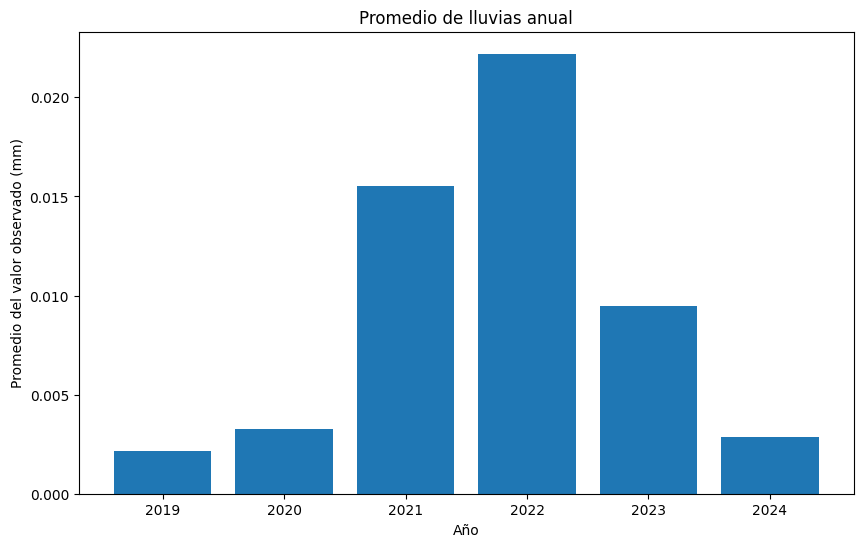

In [89]:

import matplotlib.pyplot as plt

# Filter data for the specified period (Nov 12, 2019 to Nov 12, 2024)
start_date = pd.to_datetime('2019-11-12')
end_date = pd.to_datetime('2024-11-12')
filtered_lluvias = lluvias[(lluvias['FechaObservacion'] >= start_date) & (lluvias['FechaObservacion'] <= end_date)]

# Group data by year and calculate the average rainfall
average_rainfall_per_year = filtered_lluvias.groupby(filtered_lluvias['FechaObservacion'].dt.year)['ValorObservado'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_rainfall_per_year.index, average_rainfall_per_year.values)
plt.xlabel("Año")
plt.ylabel("Promedio del valor observado (mm)")
plt.title("Promedio de lluvias anual")
plt.xticks(average_rainfall_per_year.index)  # Ensure all years are displayed on the x-axis
plt.show()

Si se quiere una información más detallada, podemos graficar el promedio de lluvias de cada mes del año de la siguiente manera:

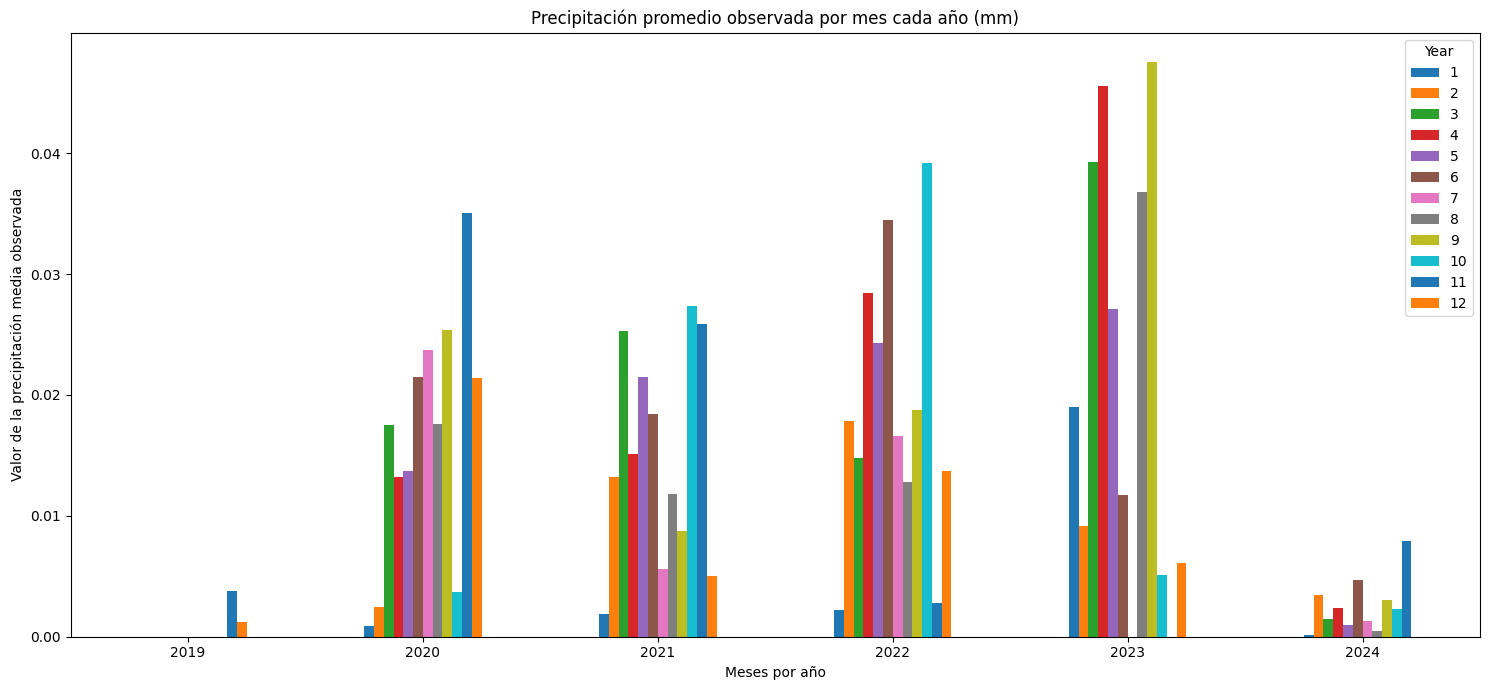

In [90]:
# Group data by year and month, then calculate the average ValorObservado
yearly_monthly_avg = lluvias.groupby([lluvias['FechaObservacion'].dt.year, lluvias['FechaObservacion'].dt.month])['ValorObservado'].mean().unstack()

# Create the histogram
yearly_monthly_avg.plot(kind='bar', figsize=(15, 7))
plt.title('Precipitación promedio observada por mes cada año (mm)')
plt.xlabel('Meses por año')
plt.ylabel('Valor de la precipitación media observada')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

Otro tipo de análisis que se puede hacer, es comparar la precipitación medida por cada estación climatológica durante el mismo periodo de tiempo. Esto nos permite acercarnos a un análisis pluvial que diferencia ciertas regiones de otras.

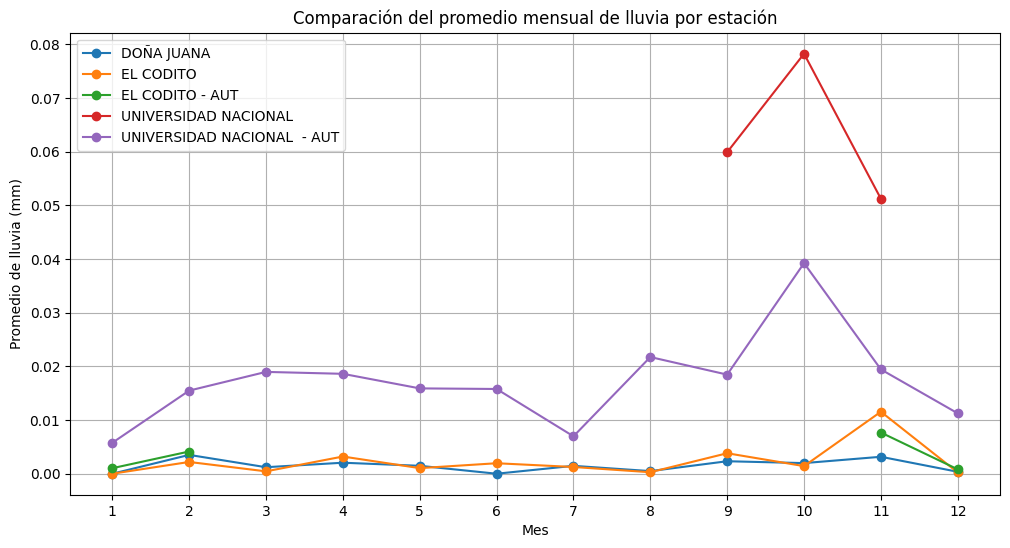

In [110]:
import matplotlib.pyplot as plt

# Filter data for stations containing specified keywords
stations_to_compare = ["Universidad Nacional", "El Codito", "Doña Juana"]
filtered_lluvias = lluvias[lluvias['NombreEstacion'].str.contains('|'.join(stations_to_compare), case=False)]

# Group data by station and month, then calculate the average ValorObservado
monthly_avg_rainfall = filtered_lluvias.groupby(['NombreEstacion', filtered_lluvias['FechaObservacion'].dt.month])['ValorObservado'].mean().unstack()

# Create line plots for each station
plt.figure(figsize=(12, 6))
for station in monthly_avg_rainfall.index:
    plt.plot(monthly_avg_rainfall.columns, monthly_avg_rainfall.loc[station], label=station, marker='o')

plt.xlabel("Mes")
plt.ylabel("Promedio de lluvia (mm)")
plt.title("Comparación del promedio mensual de lluvia por estación")
plt.xticks(monthly_avg_rainfall.columns)  # Ensure all months are displayed
plt.legend()
plt.grid(True)
plt.show()